In [7]:
import tensorflow as tf
gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

In [8]:
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    samplewise_center=True,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

In [9]:
train = datagen.flow_from_directory(
    'data/synthetic_digits/imgs_train',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

valid = datagen.flow_from_directory(
    'data/synthetic_digits/imgs_valid',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

Found 10000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train, epochs=20, validation_data=valid, verbose=1)

Epoch 1/20
313/313 [==============================] - 18s 48ms/step - loss: 1.4440 - accuracy: 0.5178 - val_loss: 0.6244 - val_accuracy: 0.7915
Epoch 2/20
313/313 [==============================] - 15s 47ms/step - loss: 0.5389 - accuracy: 0.8199 - val_loss: 0.3638 - val_accuracy: 0.8715
Epoch 3/20
313/313 [==============================] - 14s 44ms/step - loss: 0.3745 - accuracy: 0.8757 - val_loss: 0.3478 - val_accuracy: 0.8790
Epoch 4/20
313/313 [==============================] - 14s 44ms/step - loss: 0.2949 - accuracy: 0.9022 - val_loss: 0.2629 - val_accuracy: 0.9115
Epoch 5/20
313/313 [==============================] - 14s 45ms/step - loss: 0.2691 - accuracy: 0.9087 - val_loss: 0.2162 - val_accuracy: 0.9225
Epoch 6/20
313/313 [==============================] - 14s 45ms/step - loss: 0.2235 - accuracy: 0.9261 - val_loss: 0.2208 - val_accuracy: 0.9225
Epoch 7/20
313/313 [==============================] - 14s 45ms/step - loss: 0.2061 - accuracy: 0.9304 - val_loss: 0.1999 - val_accuracy:

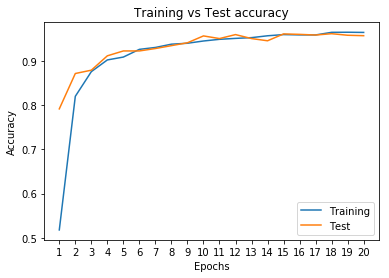

In [13]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.plot(range(1, 21), train_acc)
plt.plot(range(1, 21), val_acc)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Training', 'Test'])
plt.title('Training vs Test accuracy')
plt.show()

In [20]:
from keras.preprocessing import image as image_utils

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="rgb", target_size=(32,32))
    return image

image = load_and_scale_image('data/synthetic_digits/imgs_valid/1/1_01000.jpg')

In [21]:
image = image_utils.img_to_array(image)

In [22]:
image = image.reshape(1, 32, 32, 3)

In [23]:
image = image / 255

In [24]:
prediction = model.predict(image)
print(prediction)

[[2.9485265e-03 7.3161048e-01 3.9388500e-03 8.9680904e-04 7.7007669e-03
  1.5876706e-03 4.5173177e-03 2.4644299e-01 3.2249521e-04 3.4054920e-05]]


In [25]:
import numpy as np

print(np.argmax(prediction))

1


something


In [26]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}